In [1]:
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Data sample:

In [2]:
#loading JADES data:
data_jades=f'~/TFM/observations/hlsp_jades_jwst_nircam_goods-s-deep_photometry_v2.0_catalog.fits'

#opening extension 9 (redshifts) and 2 (coordinates):
with fits.open(data_jades) as hdul:
    header=hdul[9].header
    data=hdul[9].data
    header_coord=hdul[2].header
    data_coord=hdul[2].data

In [3]:
num=[]
z=[]
ra=[]
dec=[]

#selecting galaxies with a redshift>1:
for i in range(len(data)):
    if data['EAZY_z_a'][i]>1:
        num.append(data['ID'][i])
        z.append(data['EAZY_z_a'][i])
        ra.append(data_coord['RA'][i])
        dec.append(data_coord['DEC'][i])

#creating a new table with the relevant information:        
table=Table()
table['ID']=num
table['RA']=ra
table['DEC']=dec
table['z']=z

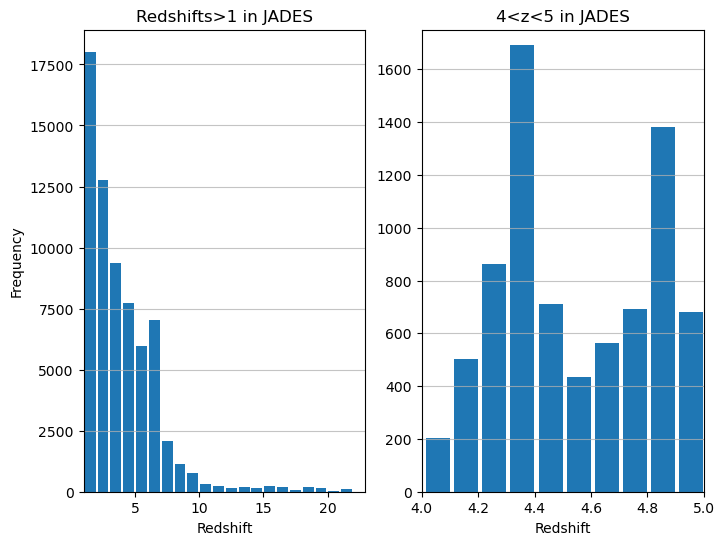

In [4]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

#histogram on all the data:
plot=ax1.hist(x=table['z'], bins=round(max(table['z']))-1, rwidth=0.85)
ax1.grid(axis='y', alpha=0.75)
ax1.set_xlabel('Redshift')
ax1.set_ylabel('Frequency')
ax1.set_title('Redshifts>1 in JADES')
ax1.set_xlim(xmin=1)

#histogram on sample 4<z<5:
plot2=ax2.hist(x=table['z'], bins=10*(round(max(table['z']))-1), rwidth=0.85)
ax2.grid(axis='y', alpha=0.75)
ax2.set_xlabel('Redshift')
ax2.set_title('4<z<5 in JADES')
ax2.set_xlim(xmin=4,xmax=5)
ax2.set_ylim(ymax=1750)

plt.show()

# Dection of barred galaxies:

We start by selecting a sample of galaxies with redshifts between 4 and 5 in order to analyze bar fraction in a smaller sample.

In [5]:
num=[]
z=[]
ra=[]
dec=[]

#selecting galaxies with 4<z<5:
for i in range(len(data)):
    if (data['EAZY_z_a'][i]>4) & (data['EAZY_z_a'][i]<5):
        num.append(data['ID'][i])
        z.append(data['EAZY_z_a'][i])
        ra.append(data_coord['RA'][i])
        dec.append(data_coord['DEC'][i])

#creating a new table with the relevant information:        
table_red=Table()
table_red['ID']=num
table_red['RA']=ra
table_red['DEC']=dec
table_red['z']=z

In [6]:
#loading image from F090W NIRcam filter:
data_jades_f090w=f'~/TFM/observations/JWST_filters/hlsp_jades_jwst_nircam_goods-s-deep_f090w_v1.0_drz/hlsp_jades_jwst_nircam_goods-s-deep_f090w_v1.0_drz.fits'
with fits.open(data_jades_f090w) as hdul:
    header=hdul[1].header
    data=hdul[1].data

In [7]:
#checking header info:
#header

hdul.close()

In [8]:
#checking data info:
#print(data.shape)
#print(type(data))
#print('Min:', np.min(data))
#print('Max:', np.max(data))

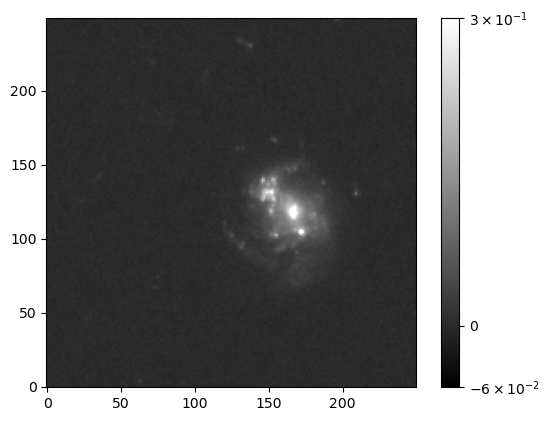

In [9]:
plt.imshow(data[8250:8500,8000:8250], cmap='grey', vmin=-0.06, vmax=0.3, norm='symlog', origin='lower')
plt.colorbar()

In [10]:
#loading image from F200W NIRcam filter:
data_jades_f200w=f'~/TFM/observations/JWST_filters/hlsp_jades_jwst_nircam_goods-s-deep_f200w_v1.0_drz/hlsp_jades_jwst_nircam_goods-s-deep_f200w_v1.0_drz.fits'
with fits.open(data_jades_f200w) as hdul:
    header2=hdul[1].header
    data2=hdul[1].data
    
#loading image from F444W NIRcam filter:
data_jades_f444w=f'~/TFM/observations/JWST_filters/hlsp_jades_jwst_nircam_goods-s-deep_f444w_v1.0_drz/hlsp_jades_jwst_nircam_goods-s-deep_f444w_v1.0_drz.fits'
with fits.open(data_jades_f444w) as hdul:
    header3=hdul[1].header
    data3=hdul[1].data

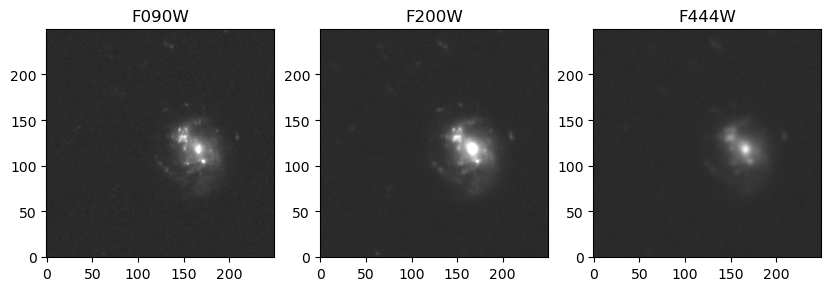

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

ax1.imshow(data[8250:8500,8000:8250], cmap='grey', vmin=-0.06, vmax=0.3, norm='symlog', origin='lower')
ax2.imshow(data2[8250:8500,8000:8250], cmap='grey', vmin=-0.06, vmax=0.3, norm='symlog', origin='lower')
ax3.imshow(data3[8250:8500,8000:8250], cmap='grey', vmin=-0.06, vmax=0.3, norm='symlog', origin='lower')

ax1.set_title('F090W')
ax2.set_title('F200W')
ax3.set_title('F444W')

plt.show()